# Forecasting Energy Demand - Milestone 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Preparing the Energy and Temperature Data

In [2]:
temp = pd.read_csv('hr_temp_20170201-20200131_subset.csv')
temp.head()

,STATION,DATE,REPORT_TYPE,SOURCE,HourlyDryBulbTemperature
0,72520514762,2017-02-01T00:53:00,FM-15,7,37.0
1,72520514762,2017-02-01T01:53:00,FM-15,7,37.0
2,72520514762,2017-02-01T02:53:00,FM-15,7,36.0
3,72520514762,2017-02-01T03:53:00,FM-15,7,36.0
4,72520514762,2017-02-01T04:53:00,FM-15,7,36.0


In [3]:
load = pd.read_csv('hrl_load_metered - 20170201-20200131.csv')
load.head()

,datetime_beginning_utc,datetime_beginning_ept,nerc_region,mkt_region,zone,load_area,mw,is_verified
0,2/1/2017 5:00,2/1/2017 0:00,RFC,WEST,DUQ,DUQ,1419.881,True
1,2/1/2017 6:00,2/1/2017 1:00,RFC,WEST,DUQ,DUQ,1379.505,True
2,2/1/2017 7:00,2/1/2017 2:00,RFC,WEST,DUQ,DUQ,1366.106,True
3,2/1/2017 8:00,2/1/2017 3:00,RFC,WEST,DUQ,DUQ,1364.453,True
4,2/1/2017 9:00,2/1/2017 4:00,RFC,WEST,DUQ,DUQ,1391.265,True


In [4]:
data = pd.DataFrame({
    'date': temp['DATE'],
    'temp': temp['HourlyDryBulbTemperature'],
    'mw': load['mw']
})
data.head()

,date,temp,mw
0,2017-02-01T00:53:00,37.0,1419.881
1,2017-02-01T01:53:00,37.0,1379.505
2,2017-02-01T02:53:00,36.0,1366.106
3,2017-02-01T03:53:00,36.0,1364.453
4,2017-02-01T04:53:00,36.0,1391.265


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    26280 non-null  object 
 1   temp    26243 non-null  float64
 2   mw      26280 non-null  float64
dtypes: float64(2), object(1)
memory usage: 616.1+ KB


In [6]:
data['date'] = pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    26280 non-null  datetime64[ns]
 1   temp    26243 non-null  float64       
 2   mw      26280 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 616.1 KB


In [7]:
data['hour'] = data['date'].dt.hour
data['weekday'] = data['date'].dt.weekday
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data.head()

,date,temp,mw,hour,weekday,month,year
0,2017-02-01 00:53:00,37.0,1419.881,0,2,2,2017
1,2017-02-01 01:53:00,37.0,1379.505,1,2,2,2017
2,2017-02-01 02:53:00,36.0,1366.106,2,2,2,2017
3,2017-02-01 03:53:00,36.0,1364.453,3,2,2,2017
4,2017-02-01 04:53:00,36.0,1391.265,4,2,2,2017


In [8]:
data.set_index('date', inplace=True)

In [9]:
data.isnull().sum()


temp       37
mw          0
hour        0
weekday     0
month       0
year        0
dtype: int64

In [10]:
data['temp'].interpolate(method='linear', inplace=True)


In [11]:
data['temp'].isnull().sum()

0

In [12]:
train = data[:'2019-12-31'].copy()
test = data['2020-01':].copy()

## Exploring / Visualizing Energy and Temperature Data 

Now that we have recreated the pieces of milestone 1 that clean and split our data we can start the data exploration phase of milestone 2.

Since our energy data is the main focus of this project, let's plot it first. Again, everything we are doing here focuses on the training data set. The test data set is only used after the modeling phase of the project is complete. Let's use matplotlib's ```plot``` function on our MW variable in the training data. I have added some labels to make it easier to visualize.

<AxesSubplot:xlabel='date'>

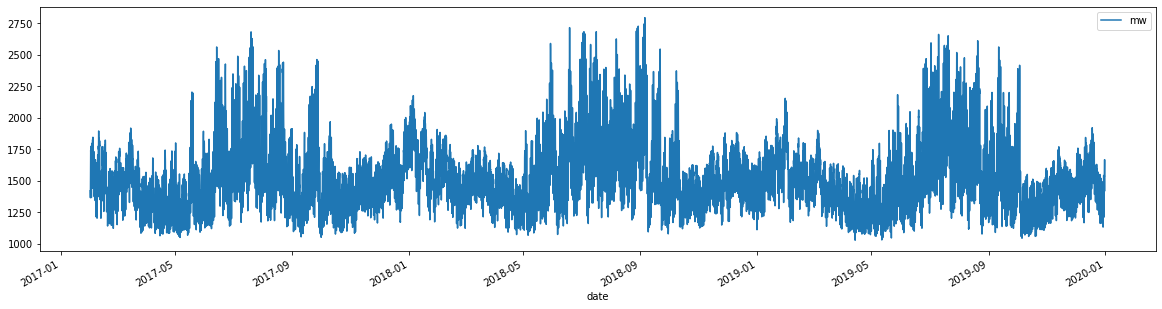

In [13]:
train.plot(y='mw', figsize=(20,5))

Looks like we have some interesting patterns in the plot above. It appears as though energy usage does cyclically move throught the year. In the spring and fall seasons, we see a drop in energy usage. This is probably due to mild temperatures making it easier (or even not necessary) to heat and cool buildings. In the winter months we see some spikes as buildings need to be heated. However, with a variety of different heating methods, electricity might not be needed in some buildings for heating. The biggest spikes appear in the summer months. This isn't too surprising. The most common way to cool a building is by using electricity to do so through AC systems.

It can be a little bit hard from this very wide view of the plot to really see if there are more granular patterns going on. Let's zoom in on a week of data in December to 2017 to see what an individual week of energy usage looks like.

<AxesSubplot:xlabel='date'>

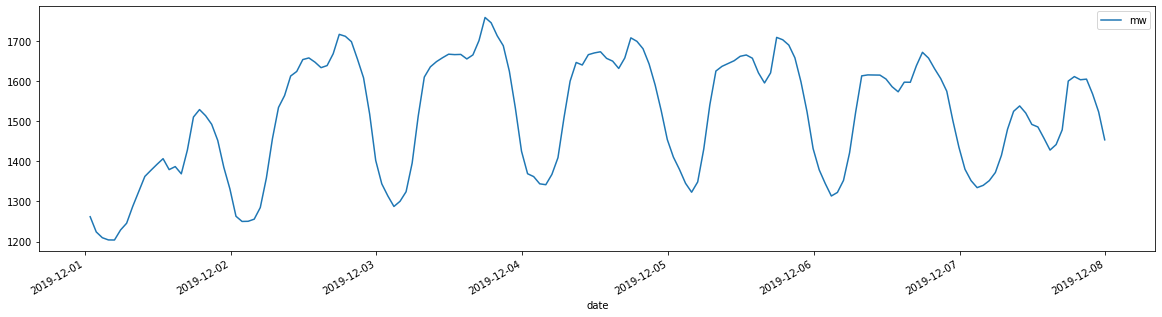

In [14]:
train['2019-12-01':'2019-12-07'].plot(y='mw', figsize=(20,5))

Now we can really see some interesting patterns! In the above plot we have Sunday through Saturday. We can easily see that Sunday and Saturday have drastically lower energy usage than the rest of the week. This isn't too surprising as most major businesses are closed on the weekends and don't need to manage the temperature of their buildings or have lights on.

Temperature outside is a big driving force behind energy usage. Let's examine the same time frames for temperature that we did for energy!

<AxesSubplot:xlabel='date'>

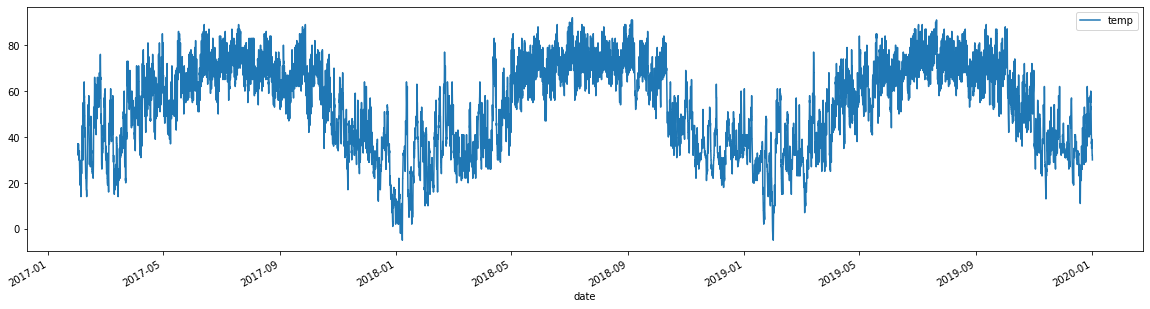

In [15]:
train.plot(y='temp', figsize=(20,5))

<AxesSubplot:xlabel='date'>

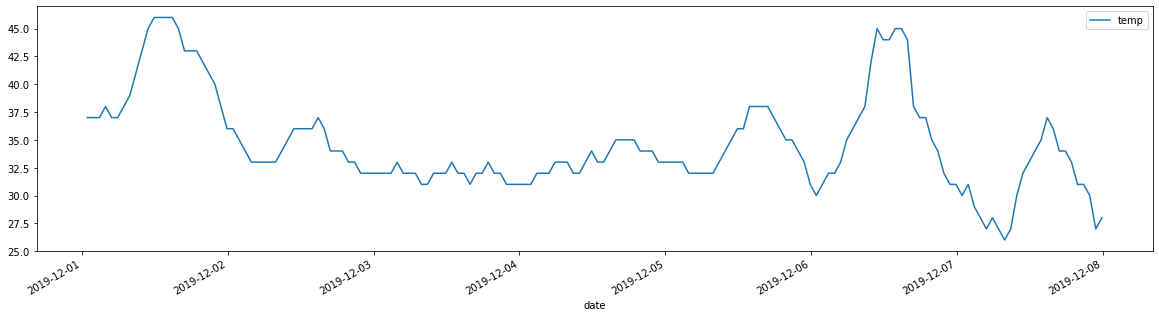

In [16]:
train['2019-12-01':'2019-12-07'].plot(y=['temp'], figsize=(20,5))

We see that temperature has a different overall pattern than energy usage. Not surprisingly, winter months are the coldest while summer months are the hottest. From this plot it might not seem that we can use temperature to predict energy as the patterns look different. Let's overlay them onto the same plot to see if that helps show any possible relationship.

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

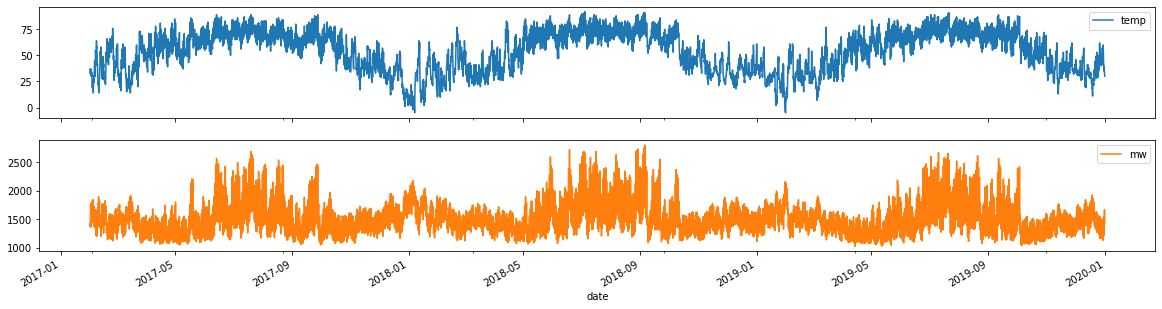

In [17]:
train.plot(y=['temp', 'mw'], subplots=True, figsize=(20,5))

Now we can start to see the relationship we were expecting from earlier! When temperature is **either** really cold or really hot (winter or summer), more energy gets used. When temperature is more mild outside (spring or fall), less energy gets used. So it looks like temperature and energy **do** have a relationship. Just potentially a complicated one. Let's remember this for our modeling!

Now let's zoom into one week of temperature and energy. However, let's examine both a week in the winter and a week in the summer.

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

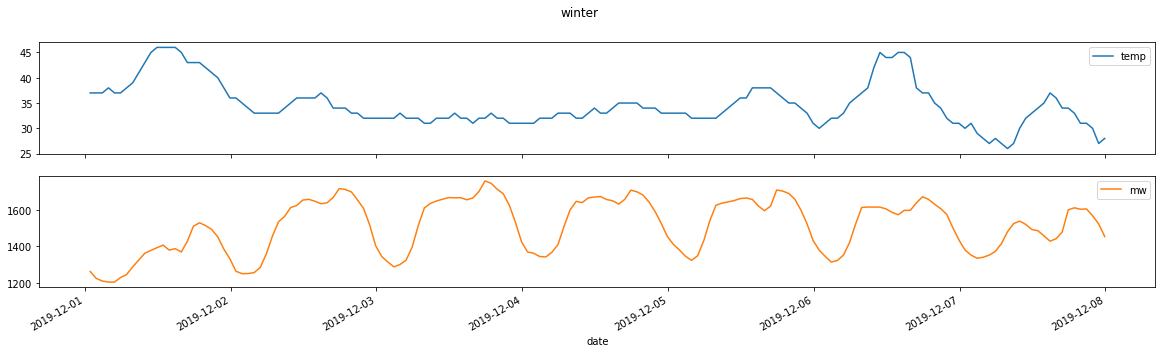

In [18]:
train['2019-12-01':'2019-12-07'].plot(title='winter', subplots=True, y=['temp', 'mw'], figsize=(20,5))

The relationship between temperature and energy seems like we would expect from this plot of a week in Janurary. When temperature spiked for a day or two, we see lower energy usage since it didn't take as much to heat the buildings. However, when temperature dropped near the end of the week, energy levels rose. 

Now let's look at a week in the summer!

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

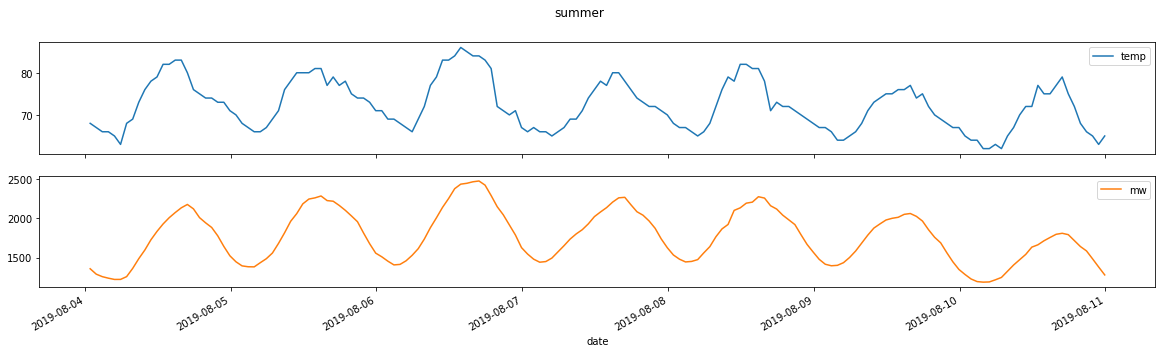

In [19]:
train['2019-08-04':'2019-08-10'].plot(title='summer', subplots=True, y=['temp', 'mw'], figsize=(20,5))

Wow! These lines are almost on top of each other! It seems that in the summer, energy usage follows very closely with temperature. As temperature goes up, so does energy usage. As temperature goes down, do does energy usage.

One measure of strength of a relationship between variables is correlation. We can easily calculate the correlation between temperature and energy using the ```corr``` funtion on our pandas data frame.

In [20]:
train[['temp', 'mw']].corr()

,temp,mw
temp,1.00000,0.32754
mw,0.32754,1.00000


Maybe you were thinking that correlation number (bounded between -1 and 1 with 0 being no relationship) would be larger in magnitude. Remember, correlation is a measure of *linear* relationship. Although temperature and energy move together in summer, they move opposite in winter. In you were to only look at correlation in only those seasons then it would be much stronger. But they have opposite effects which makes that correlation number look a little weaker.

From the previous plots we definitely know something is happening between temperature and energy usage. Let's actually create a scatter plot between temperature (the x-axis) and energy usage (y-axis).

<AxesSubplot:xlabel='temp', ylabel='mw'>

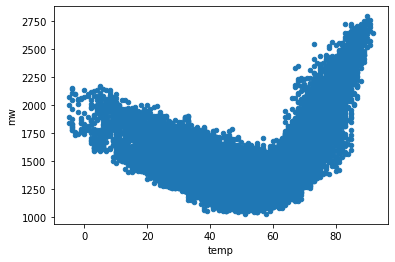

In [21]:
train.plot(x='temp', y='mw', kind='scatter')

Perfect! Energy and temperature definitely have a relationship, just a little bit of a complicated one. You could probably say that it is quadratic in nature. The interesting part is where the relationship seems to change. Looks like below 60 degrees Fahrenheit as temperature goes down, energy goes up. However, above 60 degrees Fahrenheit, as temperature goes up, so does energy usage.

Understanding the complicated relationship between these two variables through visualizations helps inform the first energy model and forecast we will build in the next section. Without this understanding our models will not be as accurate as they could be. Remember that accuracy is key in this industry. You need to deliver an accurate model to your boss. You don't want a model that works in only some seasons of the year!